# Import Libraries

In [77]:
# Import in Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)

# Load Dataset

In [81]:
# Load in dataset before encoding
# Load in Dataset
combined_resale_encode_df = pd.read_pickle('../assets/data_clean/resale_combine_encode_clean.pkl')

In [82]:
combined_resale_encode_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903393 entries, 0 to 903392
Data columns (total 354 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    floor_area_sqm                         float64
 1    lease_commence_date                    int64  
 2    resale_price                           float64
 3    remaining_lease                        int64  
 4    longitude                              float64
 5    latitude                               float64
 6    month                                  int64  
 7    year                                   int64  
 8    P1_employed                            float64
 9    P1_unemployed                          float64
 10   P1_inactive                            float64
 11   P2_pre_primary                         float64
 12   P2_primary                             float64
 13   P2_secondary                           float64
 14   P2_post_secondary                 

# Preparing Dataset
- The baseline model created in the earlier dataset has a high RMSE score.
- Overhere, further analysis will be done on the existing dataset to better understand the data.
- Columns will be selected with the intention to understand the impact on the RMSE score.

In [83]:
# View Correlation
correlations = combined_resale_encode_df.corr()['resale_price']
correlations.sort_values(ascending=False)

resale_price                 1.000000
year                         0.659012
floor_area_sqm               0.579518
lease_commence_date          0.530745
flat_type_5 ROOM             0.341535
                               ...   
P4_sgd_1000_to_1999         -0.174771
P16_hdb_3_room_flats        -0.209059
P17_hdb_3_room_flats        -0.212300
flat_model_NEW GENERATION   -0.294574
flat_type_3 ROOM            -0.483651
Name: resale_price, Length: 354, dtype: float64

In [84]:
# Get top 20 correlated column names
top_20_corr_columns = correlations.abs().nlargest(21).index[1:]
top_20_corr_columns

Index(['year', 'floor_area_sqm', 'lease_commence_date', 'flat_type_3 ROOM',
       'flat_type_5 ROOM', 'flat_type_EXECUTIVE', 'flat_model_NEW GENERATION',
       'flat_model_Apartment', 'P17_hdb_3_room_flats', 'P16_hdb_3_room_flats',
       'flat_model_Maisonette', 'P10_other_combi_mrt_lrt_or_bus',
       'flat_model_Premium Apartment', 'P4_sgd_1000_to_1999',
       'P7_hotels_restaurants', 'P11_other_combi_mrt_lrt_or_bus',
       'P8_no_literate', 'P9_no_literate', 'P5_no_family_nucleus',
       'P7_other_services_industries'],
      dtype='object')

In [85]:
# Sort the list in descending order
sorted_list = sorted(correlations, reverse=True)

# Get the top 20 values
top_20_values = sorted_list[1:21]
top_20_values

[0.6590118418210379,
 0.5795183782379861,
 0.530745221065855,
 0.3415349152623386,
 0.33111386534274356,
 0.21280442551714912,
 0.20232330678391727,
 0.1872457002127427,
 0.18333973874356116,
 0.168694780054331,
 0.16088024270528098,
 0.1569400663264152,
 0.14159781318847456,
 0.14159781318847456,
 0.13908953708860228,
 0.13186652205102925,
 0.13186652205102925,
 0.12907408197470774,
 0.1272921106767362,
 0.12714655053944315]

# Prepare Dataset with top 20 column

- Prepare dataset with top 20 columns with positive correlation

In [87]:
# selected columns for feature df = 
selected_df = combined_resale_encode_df[top_20_corr_columns]

In [88]:
# validate dataframe information
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903393 entries, 0 to 903392
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   year                            903393 non-null  int64  
 1   floor_area_sqm                  903393 non-null  float64
 2   lease_commence_date             903393 non-null  int64  
 3   flat_type_3 ROOM                903393 non-null  uint8  
 4   flat_type_5 ROOM                903393 non-null  uint8  
 5   flat_type_EXECUTIVE             903393 non-null  uint8  
 6   flat_model_NEW GENERATION       903393 non-null  uint8  
 7   flat_model_Apartment            903393 non-null  uint8  
 8   P17_hdb_3_room_flats            903393 non-null  float64
 9   P16_hdb_3_room_flats            903393 non-null  float64
 10  flat_model_Maisonette           903393 non-null  uint8  
 11  P10_other_combi_mrt_lrt_or_bus  903393 non-null  float64
 12  flat_model_Premi

## Plot Model

In [89]:
# Set Feature
X = selected_df

# Set Target Variable
y = combined_resale_df['resale_price']

In [90]:
# Create Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [91]:
# Instantiate Linear Regression Model
lr = LinearRegression()

In [92]:
# Standardise the predictors
# Instantiating Standard Scaler
sc = StandardScaler()

# Standardise Predictors
Z_train = sc.fit_transform(X_train) # standard normal distribution
Z_test = sc.transform(X_test)

In [93]:
# Fit the model
lr.fit(Z_train,y_train)

LinearRegression()

In [94]:
# Generate predictions.
preds = lr.predict(Z_test)

In [95]:
y_pred_train = lr.predict(Z_train)
y_pred_test = lr.predict(Z_test)

rmse_train = mean_squared_error(y_true =y_train, y_pred=y_pred_train, squared=False)
rmse_test = mean_squared_error(y_true =y_test, y_pred=y_pred_test, squared=False)

print(rmse_train, rmse_test)

74171.98501693807 74060.68298527724


- Observed that RMSE score has increased.
- This implies that the top 20 features for positive correlation is not sufficient to accurately predict the resale_price

# Prepare dataset 

In [100]:
# Get top 100 correlated column names
top_X_corr_columns = correlations.abs().nlargest(231).index[1:]
top_X_corr_columns

Index(['year', 'floor_area_sqm', 'lease_commence_date', 'flat_type_3 ROOM',
       'flat_type_5 ROOM', 'flat_type_EXECUTIVE', 'flat_model_NEW GENERATION',
       'flat_model_Apartment', 'P17_hdb_3_room_flats', 'P16_hdb_3_room_flats',
       ...
       'P4_sgd_12000_to_12999', 'P4_sgd_7000_to_7999',
       'P7_health_social_services', 'storey_range_07 TO 09',
       'planning_area_SEMBAWANG', 'town_SEMBAWANG', 'storey_range_06 TO 10',
       'P14_mand_oth_lang', 'P7_professional_services',
       'P16_hdb_4_room_flats'],
      dtype='object', length=230)

In [101]:
correlations.sort_values(ascending=True)

flat_type_3 ROOM            -0.483651
flat_model_NEW GENERATION   -0.294574
P17_hdb_3_room_flats        -0.212300
P16_hdb_3_room_flats        -0.209059
P4_sgd_1000_to_1999         -0.174771
                               ...   
flat_type_5 ROOM             0.341535
lease_commence_date          0.530745
floor_area_sqm               0.579518
year                         0.659012
resale_price                 1.000000
Name: resale_price, Length: 354, dtype: float64

In [102]:
for i in top_X_corr_columns:
    print(i)

year
floor_area_sqm
lease_commence_date
flat_type_3 ROOM
flat_type_5 ROOM
flat_type_EXECUTIVE
flat_model_NEW GENERATION
flat_model_Apartment
P17_hdb_3_room_flats
P16_hdb_3_room_flats
flat_model_Maisonette
P10_other_combi_mrt_lrt_or_bus
flat_model_Premium Apartment
P4_sgd_1000_to_1999
P7_hotels_restaurants
P11_other_combi_mrt_lrt_or_bus
P8_no_literate
P9_no_literate
P5_no_family_nucleus
P7_other_services_industries
flat_model_IMPROVED
P16_others
flat_model_Improved
P4_below_sgd_1000
flat_model_DBSS
P6_sgd_1000_to_1499
P7_business_services
P4_sgd_2000_to_2999
P4_no_working_person
P8_l1_chi
P9_l1_chi
P14_chinese_dialects
town_PUNGGOL
planning_area_PUNGGOL
P11_other_combi_mrt_or_bus
P14_oth_lang_oth_non_eng_lang
P12_age_70_74
P12_age_65_69
flat_model_MODEL A
P15_others
flat_model_SIMPLIFIED
P12_age_75_79
town_SENGKANG
planning_area_SENGKANG
P4_sgd_3000_to_3999
P8_l1_tam
P9_l1_tam
flat_model_Model A
latitude
longitude
P13_taoism
P14_tamil
P12_age_80_84
P12_age_60_64
P6_below_sgd_1000
flat_m

In [103]:

X1 = combined_resale_encode_df[top_X_corr_columns]
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903393 entries, 0 to 903392
Columns: 230 entries, year to P16_hdb_4_room_flats
dtypes: float64(175), int64(2), uint8(53)
memory usage: 1.2 GB


In [114]:
# Set Feature
# X1 = combined_resale_df[['year','lease_commence_date', 'floor_area_sqm'
#                          ,'P11_other_combi_mrt_lrt_or_bus','P7_hotels_restaurants'
#                          ,'P7_business_services','P8_l1_chi'
#                          ]]#floor_area_sqm

# Get top 100 correlated column names
top_X_corr_columns = correlations.abs().nlargest(353).index[1:]


X1 = combined_resale_encode_df[top_X_corr_columns]

# Set Target Variable
y1 = combined_resale_encode_df['resale_price']

# Create Train Test Split 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=123)

# Instantiate Linear Regression Model
lr1 = LinearRegression()

# Standardise the predictors
# Instantiating Standard Scaler
sc = StandardScaler()

# Standardise Predictors
Z_train1 = sc.fit_transform(X_train1) # standard normal distribution
Z_test1 = sc.transform(X_test1)

# Fit the model
lr1.fit(Z_train1,y_train1)

# Generate predictions.
preds1 = lr1.predict(Z_test1)

y_pred_train1 = lr1.predict(Z_train1)
y_pred_test1 = lr1.predict(Z_test1)

rmse_train1 = mean_squared_error(y_true =y_train1, y_pred=y_pred_train1, squared=False)
rmse_test1 = mean_squared_error(y_true =y_test1, y_pred=y_pred_test1, squared=False)

print(rmse_train1, rmse_test1) #62485.5423041087 62320.17669199029

# 353, 62485.54218515248 62320.14736717654

62485.54218515248 62320.14736717654


- Observed that setting the number of columns to 363 resulted in slightly better RMSE train and test score of 62485.5421 and62320.1473 resepectively compared to 62485.5423 and 62320.1766 when X is set as 364.
- This indicates that even though there are large amount of features, there is no clear feature which can reduce the RMSE score.
- This indicates that there are probably other variables that affect the Resale Price.

# View Relationship of Data


## Load Dataset

In [118]:
# Load Dataset before encode
combined_resale_df = pd.read_pickle('../assets/data_clean/resale_combine_clean.pkl')

## Year and Resale Price

In [130]:
# Calculate average price of resale flat grouped by town
average_price_by_year = combined_resale_df.groupby('year')['resale_price'].mean()

# convert series to df
average_price_by_year_df = pd.DataFrame(average_price_by_year).reset_index(drop=False)

In [131]:
average_price_by_year_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          34 non-null     int64  
 1   resale_price  34 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 672.0 bytes


Text(0, 0.5, 'Resale Price')

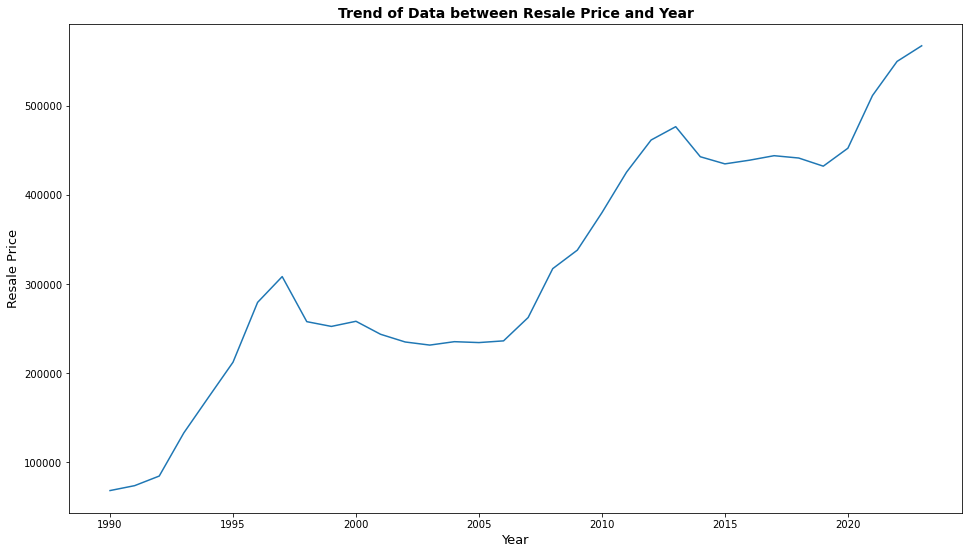

In [132]:
# Plot
plt.figure(figsize = (16, 9))
plt.plot(average_price_by_year_df['year'],average_price_by_year_df['resale_price'])
plt.title('Trend of Data between Resale Price and Year',fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize =13)
plt.ylabel('Resale Price', fontsize =13)

- Resale Price shows an increasing trend across the years.

## Year and Square Foot

In [136]:
# calculate Average Value
average_by_year_sqft = combined_resale_df.groupby('year')[['floor_area_sqm']].mean()

# convert series to df
average_by_year_sqft_df = pd.DataFrame(average_by_year_sqft).reset_index(drop=False)

Text(0, 0.5, 'Floor Area Sqm')

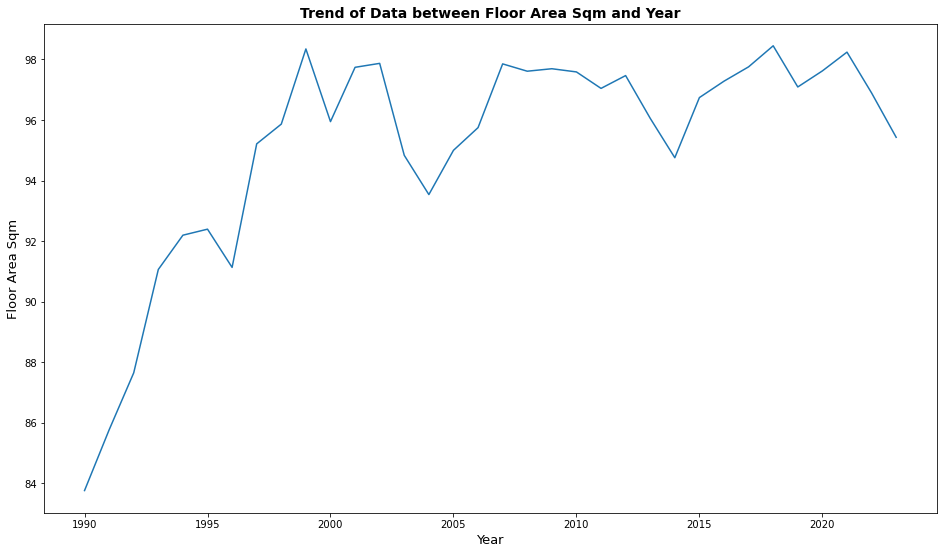

In [141]:
# Plot
plt.figure(figsize = (16, 9))
plt.plot(average_by_year_sqft_df['year'],average_by_year_sqft_df['floor_area_sqm'], label = 'Floor Area Square Feet')

plt.title('Trend of Data between Floor Area Sqm and Year',fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize =13)
plt.ylabel('Floor Area Sqm', fontsize =13)

- Observed that floor area sqm has increased over the years but reach the larger size across 2000.

## Town and Square Feet

In [150]:
# calculate Average Value
average_by_town_sqft = combined_resale_df.groupby('town')[['floor_area_sqm']].mean()

# convert series to df
average_by_town_sqft_df = pd.DataFrame(average_by_town_sqft).reset_index(drop=False)

Text(0, 0.5, 'Floor Area Sqm')

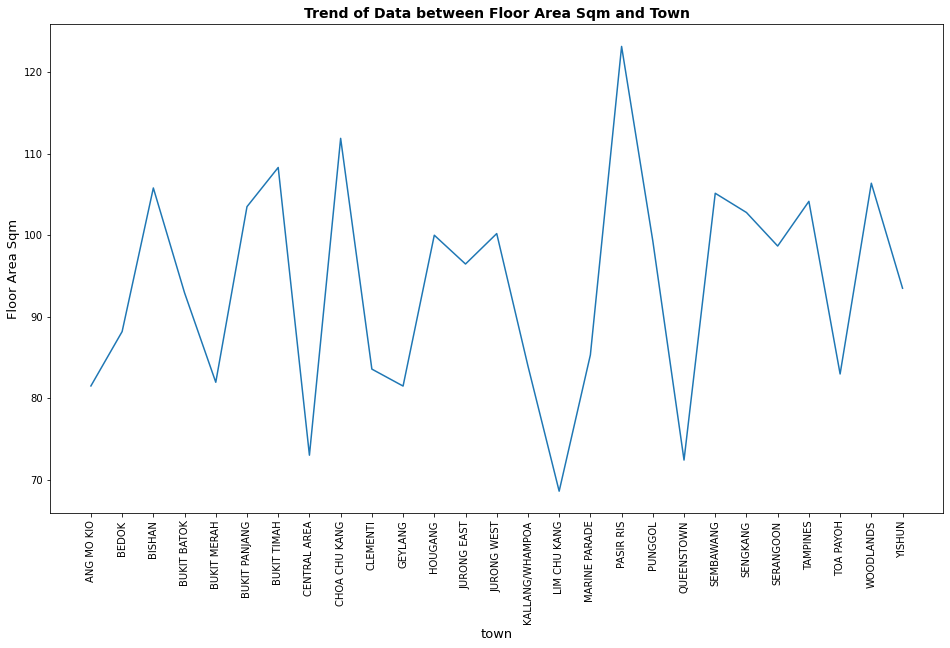

In [151]:
# Plot
plt.figure(figsize = (16, 9))
plt.plot(average_by_town_sqft_df['town'],average_by_town_sqft_df['floor_area_sqm'], label = 'Floor Area Square Feet')

plt.title('Trend of Data between Floor Area Sqm and Town',fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.xlabel('town', fontsize =13)
plt.ylabel('Floor Area Sqm', fontsize =13)

- Observed that flat size differs across different town.
- Pasir Ris has the largest resale flat size, followed by Woodlands and Choa Chu Kang.


# Summary

# Model results and analysis

The modelling results are as follows:
- Linear regression will be represented br 'lr'
- Lasso Regression will be represented by 'ls'
- Ridge regression will be presented by 'rg'

|            |lr_r2  | lr_score | ls_alpha10_RMSE| rg_alpha10_RMSE | ls_alpha1_RMSE |  rg_alpha1_RMSE |
|------------|-------|----------|----------------|-----------------|----------------|-----------------|
|**Train**   |0.8558 | 0.8559   | 62498.197      | 62485.633       | 62488.602      | 62485.5270      |
|**Test**    |0.8558 | 0.85596  | 62333.025      | 62320.400       | 62322.953      | 62320.3802      |


Observed that in modelling the data, there are neglible changes between the RMSE Train and RMSE Test Score.
- The best performing model is Ridge Regression where alpha is set as 1.

## Overall Analysis

- The data has a high number of features. This results in high variance and low biasesness. The data is less likely to be overfitted.
- This is also in in the r2 score which shows that both Train and Test has similar school, indicated that the data is not overfitted.


## Conclusion and Recommendation

- After modelling and doing analysis on the data, it is concluded that the current amount of data is insufficient to model accurately with low RMSE score. 
- The dataset used has multiple features and several insights can be derived such as:
    - Overall resale flat price has increased across the years.
    - Pasir Ris has larger flats followed by Woodlands and Choa Chu Kang. Should floor size be of priority. These areas can be considered when purchasing a flat.
    - Resale flat size has overall increase between 1990 to 2000. After 2000, the size of resale flat has not increase drastically and fluctuates above 95sqm

## Model Limitation and Next Steps

- Current features are insufficient to model the data to a higher RMSE score
- Next Step:
    - Create a new price column to take into account inflation across the years.
    - Retrieve Latitude and Longitude on places of interest. Distance can be calculate between the resale flat and places of interest to be used for analysis.
    - Further Analysis and get insights from the features such as education, religion, population literacy, spoken language
    - Explore different models such as Prophet and Time Series Analysis.